# Qiskit Introduction

First of all, Import required functions from Qiskit.

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, quantum_info, IBMQ, Aer, execute
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram


Loading our account we get access to the real quantum computers we are entitled to use.

In [2]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

One more import: a useful pretty printer for vectors and matrices 

In [3]:
# Utility for better visualization
from qiskit_textbook.tools import array_to_latex

## Create a Circuit

To create a circuit we will need a Quantum register for qubits, and a Classical register for bits. 

We cannot "see" the state of a qubit, so we need to measure it. 

The measure results will be stored in the classical register.

In [4]:
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
cr = ClassicalRegister(2, name="c") # and 2 classical bits

qc = QuantumCircuit(qr, cr)

The quantum circuit is a complex system that behaves globally, more than the sum of its parts.


The current situation of the circuit is represented by its state vector. Similar to bits that have a value, meaning a current state (0 / 1), and have no memory of how it gets to that value, Quantum circuits have a "value" that is the state vector (and also they don't know how they have reached there).

Let's see the initial Statevector for our circuit:

In [5]:
initial_state = quantum_info.Statevector.from_instruction(qc)
array_to_latex(initial_state.data, pretext="|000\\rangle =")

<IPython.core.display.Math object>

We use the Dirac notation to name this vector as $|000\rangle$ meaning it is the state with all qubits at 100% probability to be measured 0.


As we have 3 qubits, we have a state vector of 8 dimensions.

We can think in this vector a column with the probabilities of measuring 000, 001, 010,...,111

## Superposition

Add H Gate

In [6]:
qc.h(0) # Put qubit a into state |+>

Print the circuit

In [7]:
print(qc)

     ┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 2/═════
          


Plot the circuit

In [8]:
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 2/═════

Let's see the state of the circuit after the Hadamard gate

In [9]:
psi = quantum_info.Statevector.from_instruction(qc)
array_to_latex(psi.data, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

This is a superposition state.


After the H gate, the qubit $q_0$ has a probability of 50% of being measured 0 and 50% of being measured 1.


As you can see, the probabilities are the square of the coefficients in the state vector.


The sum of all probabilities is always 1, so the module of this state vector must be 1.

### Graphical representation: The Bloch Sphere.

To represent the state of individual qubits, we can use the Bloch Sphere.

Intuitively, the array is as near to the poles as the probability of measuring 1 or 0, respectively.

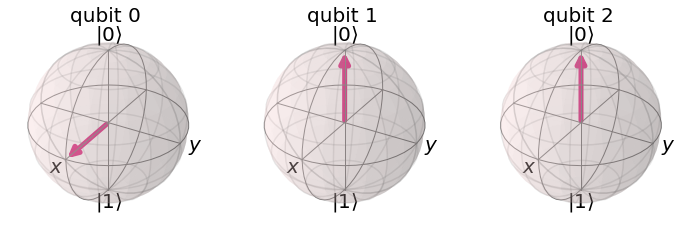

In [10]:
plot_bloch_multivector(psi)

## Entanglement

Add CX Gate

As this is a two qubit gate, we have to set the control qubit and the controlled qubit.

In [11]:
qc.cx(0,1) # CNOT with a as control and b as target

Draw the circuit

In [12]:
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
q_2: ──────────
               
c: 2/══════════

Let's see the state vector

In [13]:
psi = quantum_info.Statevector.from_instruction(qc)
array_to_latex(psi.data, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

Now we have 50% of measuring 000 and 50% of measuring 011.

This result cannot be achieved with two independent aleatory variables.

Can we now use the Bloch spheres to represent the system??

Let's try

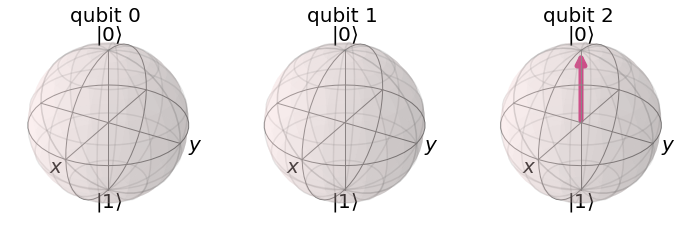

In [14]:
plot_bloch_multivector(psi)

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

It is not possible, because qubits are no more independent, they are in an entangled state.


We have other representations like the QSphere, that represent the accessible states of the system.

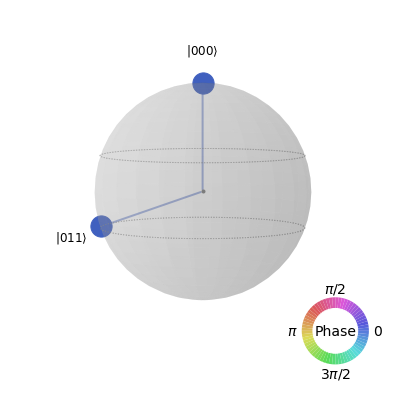

In [15]:
plot_state_qsphere(psi)

## Using simulators

Simulators are important because we cannot see inside the real state of a quantum system, so we need to simulate, to understand what is happening.

Let's see the available Local Backends.

In [16]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### Unitary Simulator

A circuit changes the quantum state, in this multidimensional space, it rotates the state vector.

To rotate a vector we multiply by a rotation matrix.

And as our vector must have modulus 1, this rotation matrix must be a unitary matrix.

This simulator calculates the circuit equivalent unitary matrix.

In [17]:
backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend).result()

unitary = result.get_unitary()

array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

## Statevector Simulator

We have been using it from the beginning of this notebook.

It calculates the state vector of the system.

In [18]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()

final_state = result.get_statevector()

array_to_latex(final_state, pretext="\\text{Final State} = ")

<IPython.core.display.Math object>

## QASM Simulator

This kind of simulator tries to mimic the behavior of a real quantum computer. In this case, this is a "perfect" (== without noise) Quantum Computer

One important aspect of dealing with real quantum computers is that we need to measure the qubits because, in a real quantum computer, we only can read the classical registers, remember, state vectors cannot be seen.

In [19]:
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
q_2: ───────────░──╫──╫─
                ░  ║  ║ 
c: 2/══════════════╩══╩═
                   0  1

Let's execute the circuit.

It is important that we need a new parameter, the number of shots.

If we execute the circuit only once (shots=1), we'll get a measure, only one (i.e. 011).

In order to understand the probability distribution of the possible outcomes of the measurement of the circuit, we have to make this many times and "count" the results. 

In [20]:
backend = Aer.get_backend('qasm_simulator')
job_exp = execute(qc, backend=backend, shots=2000)

exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)


{'00': 977, '11': 1023}


It is easy to interpret these results as a histogram.

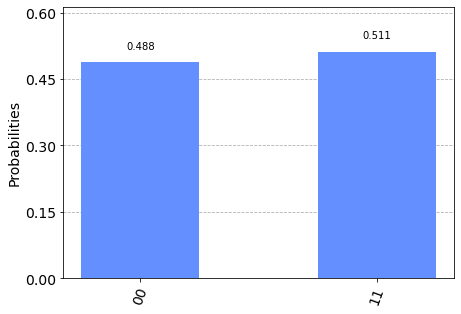

In [21]:

plot_histogram(exp_measurement_result)

As you can see, although the probability of 11 and 00 are theoretically equal (50%), when we execute shots and perform statistics, the result is not 50%.

We will only get 50% if we take infinite shots.

This is not due to errors. The final state vector is always the same, this is a statistical effect in the measurement. 

## Real Quantum Computer

Let's se the available systems we have

In [22]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo

We have some utility functions to search for the more suitable system.

In [23]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print(backend)

ibm_oslo


We send our job to the queue and receive the job id.

In [24]:
job = execute(qc, backend=backend, shots=8192)
print(job.job_id())

62c354edd529f24c6b2ceb06


We can monitor the status of our job.

In [25]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


Once it is executed, we have the counts just like the simulator and can plot the histogram.

{'00': 3846, '01': 279, '10': 134, '11': 3933}


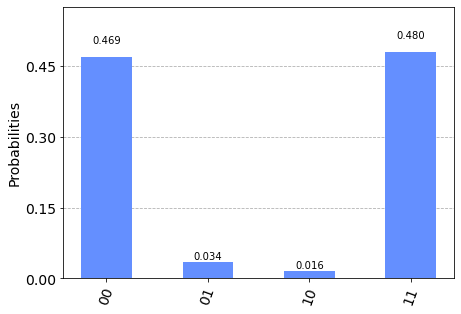

In [26]:
exp_result = job.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In this case, we can see that there are also some counts in the "unreachable" states. This is due to errors in the real quantum computer.

Intuitively you can see that if we have a very long circuit, the errors will be cumulative and at some point, we will be not able to identify the correct results from the noise. This is measured by the Quantum Volume.

In [27]:
import qiskit.tools.jupyter
%qiskit_version_table